Anand Sir -
Starting of Deep Learning
#ANN 1

In [2]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/DeepLearning_Workshop/housepricedata.csv')

In [11]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [12]:
df.shape

(1460, 11)

In [13]:
dataset = df.values
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [14]:
X = dataset[:,0:10]
Y = dataset[:,10]

In [17]:
from sklearn import preprocessing 
min_max_scaler = preprocessing.MinMaxScaler()
x_scale = min_max_scaler.fit_transform(X)

In [18]:
x_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_val_and_test,y_train,y_val_and_test = train_test_split(x_scale,Y,test_size=0.3)
x_val,x_test,y_val,y_test = train_test_split(x_val_and_test,y_val_and_test, test_size=0.5)

In [26]:
print("Shapes of various stuff \n")
print(x_train.shape,"\n",x_val.shape,"\n",x_test.shape,"\n",y_train.shape,"\n",y_val.shape,"\n",y_test.shape)

Shapes of various stuff 

(1022, 10) 
 (219, 10) 
 (219, 10) 
 (1022,) 
 (219,) 
 (219,)


In [27]:
from tensorflow import keras
from keras.models import Sequential 
from keras.layers import Dense 
from tensorflow.keras import layers
import timeit

In [29]:
#Defining Model
model = Sequential()
#Input Layer
model.add(Dense(32,activation='relu',input_shape=(10,)))
model.add(Dense(32,activation='relu'))

In [30]:
#Output Layer
model.add(Dense(1,activation='sigmoid'))

#Alternate way of setting optimizer
#some stuff sathvik copied(not necessary)

#Compiling model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [46]:
# Checking training time
start = timeit.default_timer()
hist = model.fit(x_train,y_train,batch_size=256,epochs=300,validation_data=(x_val,y_val),verbose=2)
stop = timeit.default_timer()
print("Time: ", (stop - start)/60, "minutes")
model.summary()

Epoch 1/300
4/4 - 0s - loss: 0.0361 - accuracy: 0.9834 - val_loss: 2.4126 - val_accuracy: 0.8721 - 50ms/epoch - 13ms/step
Epoch 2/300
4/4 - 0s - loss: 0.0365 - accuracy: 0.9892 - val_loss: 2.4267 - val_accuracy: 0.8767 - 49ms/epoch - 12ms/step
Epoch 3/300
4/4 - 0s - loss: 0.0369 - accuracy: 0.9824 - val_loss: 2.4186 - val_accuracy: 0.8721 - 73ms/epoch - 18ms/step
Epoch 4/300
4/4 - 0s - loss: 0.0393 - accuracy: 0.9873 - val_loss: 2.4243 - val_accuracy: 0.8767 - 64ms/epoch - 16ms/step
Epoch 5/300
4/4 - 0s - loss: 0.0378 - accuracy: 0.9814 - val_loss: 2.4739 - val_accuracy: 0.8767 - 63ms/epoch - 16ms/step
Epoch 6/300
4/4 - 0s - loss: 0.0464 - accuracy: 0.9824 - val_loss: 2.4599 - val_accuracy: 0.8676 - 46ms/epoch - 12ms/step
Epoch 7/300
4/4 - 0s - loss: 0.0332 - accuracy: 0.9912 - val_loss: 2.4871 - val_accuracy: 0.8721 - 55ms/epoch - 14ms/step
Epoch 8/300
4/4 - 0s - loss: 0.0378 - accuracy: 0.9824 - val_loss: 2.3999 - val_accuracy: 0.8493 - 45ms/epoch - 11ms/step
Epoch 9/300
4/4 - 0s - l

In [38]:
#Visualising Model

In [ ]:
#Calculating Accuracy

In [ ]:
print("Generate Predictions for all samples")
yhat = model.predict(x_test)
#yhat
#finish

In [42]:
# Print accuracy score 
from sklearn.metrics import accuracy_score 
#test_score=accuracy_score(yhat,y_test)

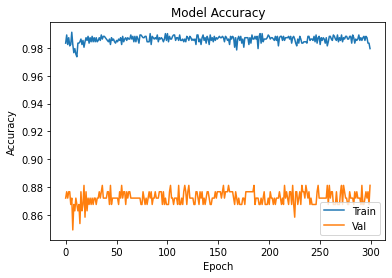

In [47]:
# plotting train vs validation loss
#some code

# plotting train vs validation accuracy
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Val'],loc='lower right')
plt.show()

In [ ]:
# End

# P2